<a href="https://colab.research.google.com/github/Sagar-DC/Loan-Prediction/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading Train Data**
[Train Data](https://github.com/Sagar-DC/Loan-Prediction/blob/master/Data/train_ctrUa4K.csv)

In [0]:
train_url = "https://raw.githubusercontent.com/Sagar-DC/Loan-Prediction/master/Data/train_ctrUa4K.csv"
test_url = "https://raw.githubusercontent.com/Sagar-DC/Loan-Prediction/master/Data/test_lAUu6dG.csv"

train = pd.read_csv(train_url, index_col= False)
test = pd.read_csv(test_url, index_col= False) 

In [0]:
train_orginal = train.copy()
test_orginal = test.copy()

In [5]:
train.iloc[125:130, :]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
128,LP001451,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N
129,LP001465,Male,Yes,0,Graduate,No,6080,2569.0,182.0,360.0,NaN,Rural,N


# **Know Loan data**

In [0]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [0]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [0]:
print("Shape of Train & Test\n", train.shape, test.shape)

Shape of Train & Test
 (614, 13) (367, 12)


In [0]:
print("Data types of Train Features\n", train.dtypes)

Data types of Train Features
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


# ***Exploratory Data Analysis***

## Univariate & Bivariate Analysis




### > Univariate Analysis



*Target Variable*

In [0]:
status_count = train['Loan_Status'].value_counts()
status_count

Y    422
N    192
Name: Loan_Status, dtype: int64

In [0]:
status_prop = train['Loan_Status'].value_counts(normalize = True)
status_prop

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

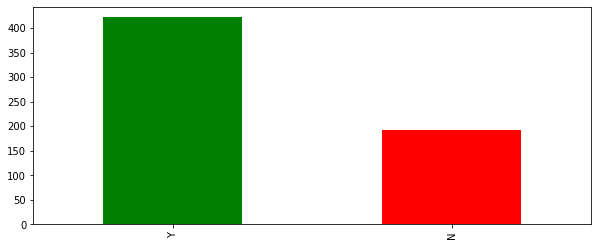

	The loan of 422(68.73%) applicant out of 614 was approved.


In [0]:
train['Loan_Status'].value_counts().plot.bar(figsize = (10, 4), color = ['Green', 'Red']) 
plt.show()
print("\tThe loan of {}({}%) applicant out of {} was approved.".format(status_count[0], round(status_prop[0]*100,2), train.shape[0]))

*Independent Variables*

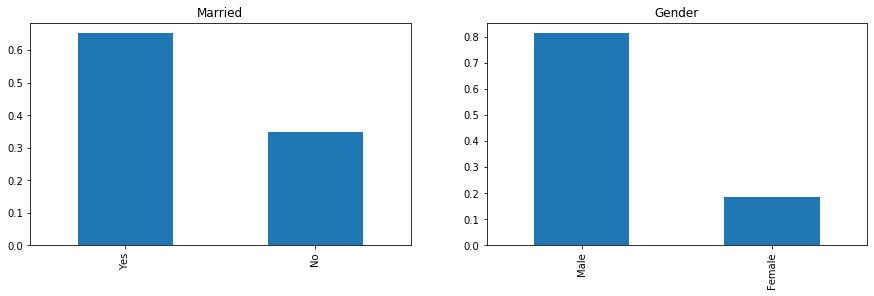

About 65% of the applicants in the dataset are married.  	 About 80% applicants in the dataset are male.


In [0]:
#Categorical
plt.subplot(221)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(222)
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender', figsize = (15, 9)) 
plt.show()

print("About 65% of the applicants in the dataset are married.  \t About 80% applicants in the dataset are male.")

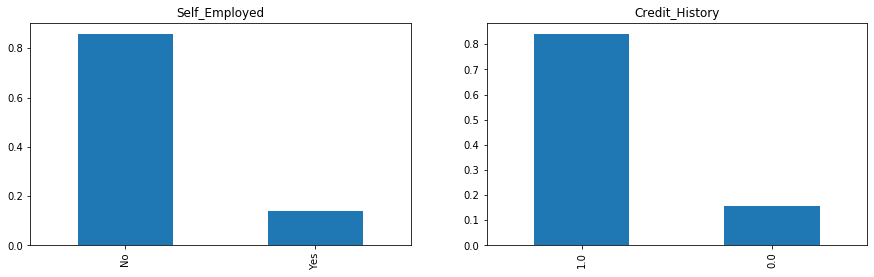

About 85% applicants in the dataset are not self employed. 	  About 85% applicants have repaid the loan.


In [0]:
#Ordinal
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed', figsize = (15, 9)) 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

print("About 85% applicants in the dataset are not self employed. \t  About 85% applicants have repaid the loan.")

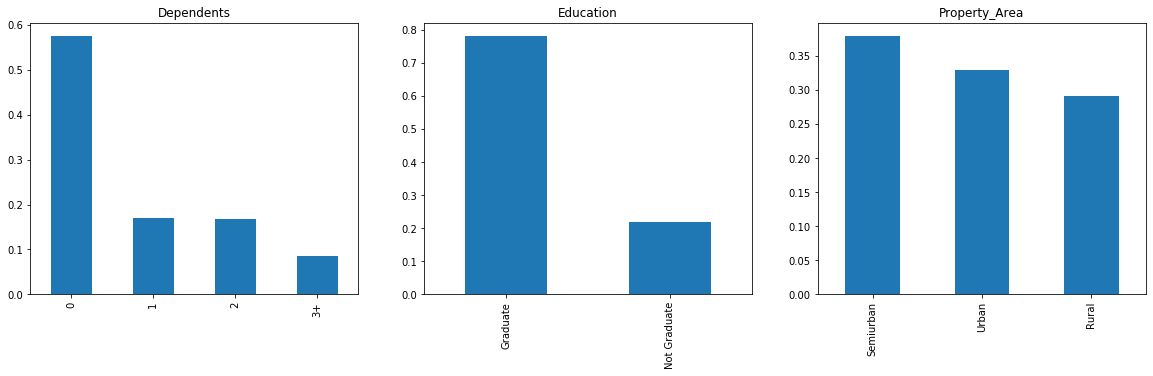

Most of the applicants don’t have dependents. 		 About 80% of the applicants are Graduate. 	 Most of the applicants are from Semiurban area.


In [0]:
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,5), title= 'Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

print("Most of the applicants don’t have dependents. \t\t About 80% of the applicants are Graduate. \t Most of the applicants are from Semiurban area.")

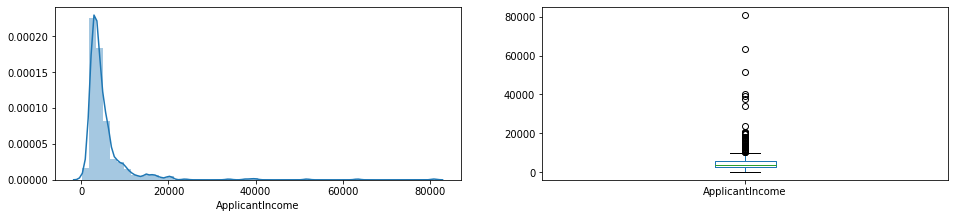

			 Applicant income data is skewed towards left, i.e it is not normally distributed
					 Box plot indecates the presence of outliers


In [0]:
plt.subplot(221)
sns.distplot(train['ApplicantIncome'])
plt.subplot(222)
train['ApplicantIncome'].plot.box(figsize=(16,7)) 
plt.show()

print("\t\t\t Applicant income data is skewed towards left, i.e it is not normally distributed")
print("\t\t\t\t\t Box plot indicates the presence of outliers")

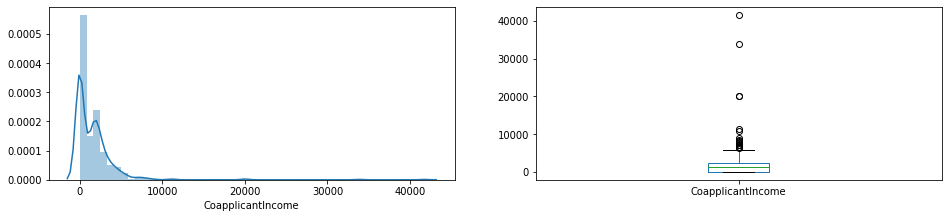

					 Majority of coapplicant’s income ranges from 0 to 5000.
			 We also see a lot of outliers in the coapplicant income and it is not normally distributed.


In [0]:
plt.subplot(221) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(222) 
train['CoapplicantIncome'].plot.box(figsize=(16,7)) 
plt.show()

print("\t\t\t\t\t Majority of coapplicant’s income ranges from 0 to 5000.")
print("\t\t\t We also see a lot of outliers in the coapplicant income and it is not normally distributed.")

### > Bivariate Analysis



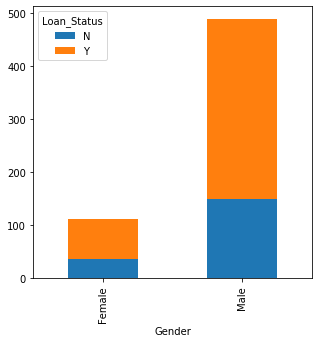

In [0]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']).plot(kind="bar", stacked=True, figsize=(5,5))

In [0]:
pd.crosstab(train['Married'],train['Loan_Status']).plot(kind="bar", stacked=True, figsize=(4,4))
pd.crosstab(train['Dependents'],train['Loan_Status']).plot(kind="bar", stacked=True) 
pd.crosstab(train['Education'],train['Loan_Status']).plot(kind="bar", stacked=True, figsize=(4,4))
pd.crosstab(train['Self_Employed'],train['Loan_Status']).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

In [0]:
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

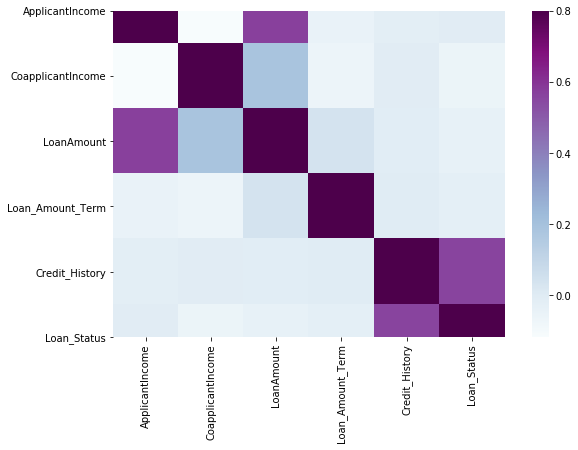

(ApplicantIncome - LoanAmount) & (Credit_History - Loan_Status) are most correlated variables 
			 LoanAmount is also correlated with CoapplicantIncome.


In [0]:
plt.subplots(figsize=(10, 6))
sns.heatmap(train.corr(), vmax=.8, square=True, cmap="BuPu")
plt.show()

print("(ApplicantIncome - LoanAmount) & (Credit_History - Loan_Status) are most correlated variables ")  
print("\t\t\t LoanAmount is also correlated with CoapplicantIncome.")

## Handling Missing Values and Outliers

### Missing Values

In [7]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**Imputing Missing Values**



*   *numerical variables*: imputate using mean or median.
*   *categorical variables*: imputate using mode












In [8]:
train['Gender'].fillna(train['Gender'].value_counts().index[0], inplace = True)
train['Married'].fillna(train['Married'].value_counts().index[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].value_counts().index[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].value_counts().index[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].value_counts().index[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].value_counts().index[0], inplace = True)

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

if(train.isna().sum().sum() == 0):
  print("All missing values are imputed")

All missing values are imputed


In [9]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 

test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

if(test.isna().sum().sum() == 0):
  print("All missing values are imputed")

All missing values are imputed


### Outliers

LoanAmount contains outliers, which we saw using boxplot earlier.
LoanAmount data is right skewed. One way to remove the skewness is by doing the log transformation

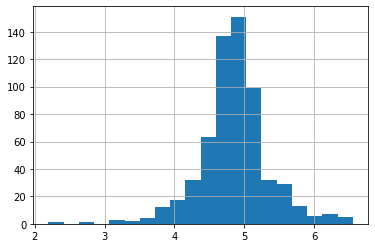

LoanAmount distribution becames much closer to normal distribution


In [13]:
np.log(train['LoanAmount']).hist(bins=20) 
plt.show()
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

print("LoanAmount distribution becames much closer to normal distribution")

In [14]:
print("Shape of Train & Test\n", train.shape, test.shape)

Shape of Train & Test
 (614, 14) (367, 13)


# **Building Model**

In [0]:
train = train.drop('Loan_ID', axis=1) 
test = test.drop('Loan_ID', axis=1)

In [0]:
x = train.drop('Loan_Status', axis=1) 
y = train.Loan_Status

In [0]:
x = pd.get_dummies(x)

Logistic Regression using stratified k-folds cross validation

In [0]:
from sklearn.model_selection import StratifiedKFold

In [0]:
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)
pred_test_full = 0
cv_score = []
i = 1 

In [28]:
for train_index,test_index in kf.split(x,y):
    print('{} of KFold {}'.format(i, kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]

1 of KFold 5
1 of KFold 5
1 of KFold 5
1 of KFold 5
1 of KFold 5


In [0]:
for train_index,test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))     
  xtr,xvl = X.loc[train_index],X.loc[test_index]     
  ytr,yvl = y[train_index],y[test_index]   

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [54]:
model = LogisticRegression(random_state=1)     
model.fit(xtr, ytr)     
pred_train = model.predict(xvl)   

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
score = accuracy_score(yvl,pred_train)   
print('accuracy_score',score)  

accuracy_score 0.8360655737704918


In [0]:
t = pd.get_dummies(test)

In [0]:
i += 1 
pred_test = model.predict(t) 
pred = model.predict_proba(xvl)[:,1]

In [0]:
subbmission_url = "https://raw.githubusercontent.com/Sagar-DC/Loan-Prediction/master/Data/sample_submission_49d68Cx.csv"

submission = pd.read_csv(subbmission_url, index_col= False)

In [46]:
subbmision.columns

Index(['Loan_ID', 'Loan_Status'], dtype='object')

In [0]:
submission_LR = pd.DataFrame(columns = list(submission.columns), index = submission.index)

In [48]:
submission_LR.head()

,Loan_ID,Loan_Status
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [49]:
submission_LR['Loan_ID'] = submission.Loan_ID
submission_LR['Loan_Status'] = pred_test
submission_LR.shape

(367, 2)

In [0]:
submission_LR.to_csv("submission_LR.csv", index= False)

In [52]:
!head submission_LR.csv

Loan_ID,Loan_Status
LP001015,1
LP001022,1
LP001031,1
LP001035,1
LP001051,1
LP001054,1
LP001055,1
LP001056,0
LP001059,1
